# Keras MNIST - Digits Classification with a Dense Network

In [30]:
import sys, os, random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print(f"Using Tensorflow {tf.__version__}")

import kr_helper_funcs as kru

SEED = 121
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

Using Tensorflow 2.5.0


In [24]:
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10
NUM_EPOCHS, BATCH_SIZE, LEARNING_RATE, L2_REG = 25, 64, 0.001, 0.0005
MODEL_SAVE_DIR = os.path.join('.', 'model_states')

In [25]:
# load the MNIST digits dataset
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n" +
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

# reshape the images
train_images = train_images.reshape((train_images.shape[0], IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS))
test_images = test_images.reshape((test_images.shape[0], IMAGE_HEIGHT * IMAGE_WIDTH * NUM_CHANNELS))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
print('After pre-processing')
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n" +
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28) - test_labels.shape: (10000,)
After pre-processing
train_images.shape: (60000, 784) - train_labels.shape: (60000,)
test_images.shape: (10000, 784) - test_labels.shape: (10000,)


In [26]:
model = Sequential([
    Dense(512, activation='relu', input_shape=((IMAGE_HEIGHT * IMAGE_WIDTH *NUM_CHANNELS),)),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
hist = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2748 - accuracy: 0.9218
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1089 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0725 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0505 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0363 - accuracy: 0.9898


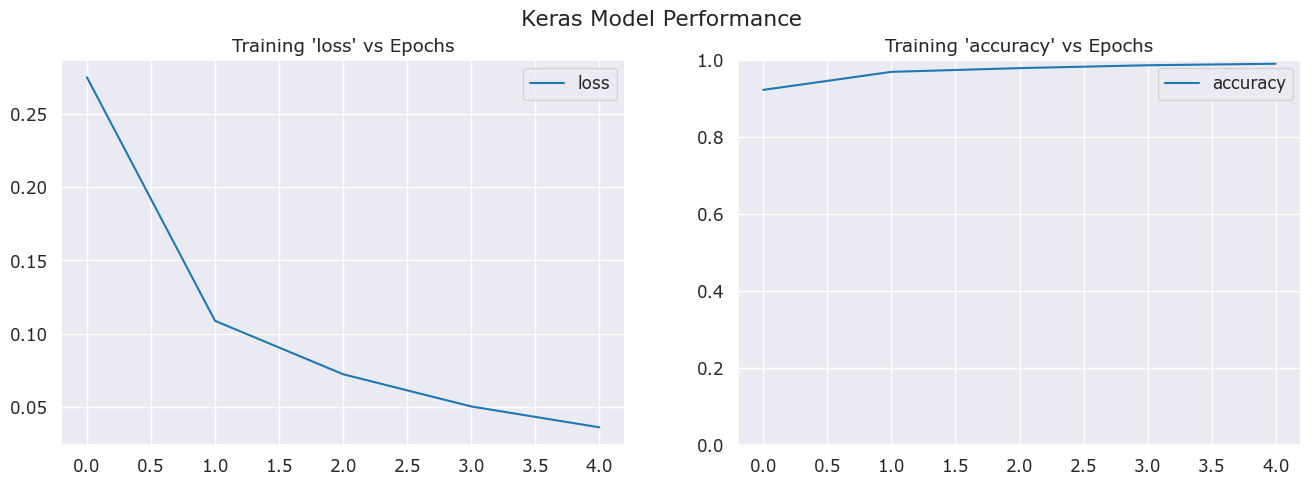

In [28]:
kru.show_plots(hist.history, metric='accuracy', plot_title='Keras Model Performance')

In [29]:
# evaluate performance
loss, acc = model.evaluate(train_images, train_labels)
print(f'Training -> loss: {loss:.3f} - acc: {acc:.3f}')
loss, acc = model.evaluate(test_images, test_labels)
print(f'Testing  -> loss: {loss:.3f} - acc: {acc:.3f}')

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0261 - accuracy: 0.9935
Training -> loss: 0.026 - acc: 0.994
313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9786
Testing  -> loss: 0.068 - acc: 0.979


In [32]:
# run predictions
test_predictions = model.predict(test_images)

y_pred = np.argmax(test_predictions, axis=1)
test_labels[:20], y_pred[:20]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
       dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
       dtype=int64))

# Data Science Solutions with Python

In [34]:
import sys, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 101
random.seed(SEED)
np.random.seed(SEED)

np.set_printoptions(precision=6, linewidth=1024, suppress=True)
# pd.set_option("display.max_rows", 1024)
# pd.set_option("display.max_cols", 1024)
plt.style.use('seaborn')
sns.set(context='notebook', style='darkgrid', font_scale=1.10)


In [35]:
df = pd.read_csv('./data/WA_Fn-UseC_-Marketing_Customer_Value_Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [36]:
drop_column_names = df.columns[[0, 6]]
initial_data = df.drop(drop_column_names, axis="columns")
initial_data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
initial_data.iloc[::, 0] = pd.get_dummies(initial_data.iloc[::, 0])
initial_data.iloc[::, 2] = pd.get_dummies(initial_data.iloc[::, 2])
initial_data.iloc[::, 3] = pd.get_dummies(initial_data.iloc[::, 3])
initial_data.iloc[::, 4] = pd.get_dummies(initial_data.iloc[::, 4])
initial_data.iloc[::, 5] = pd.get_dummies(initial_data.iloc[::, 5])
initial_data.iloc[::, 6] = pd.get_dummies(initial_data.iloc[::, 6])
initial_data.iloc[::, 7] = pd.get_dummies(initial_data.iloc[::, 7])
initial_data.iloc[::, 8] = pd.get_dummies(initial_data.iloc[::, 8])
initial_data.iloc[::, 9] = pd.get_dummies(initial_data.iloc[::, 9])
initial_data.iloc[::, 15] = pd.get_dummies(initial_data.iloc[::, 15])
initial_data.iloc[::, 16] = pd.get_dummies(initial_data.iloc[::, 16])
initial_data.iloc[::, 17] = pd.get_dummies(initial_data.iloc[::, 17])
initial_data.iloc[::, 18] = pd.get_dummies(initial_data.iloc[::, 18])
initial_data.iloc[::, 20] = pd.get_dummies(initial_data.iloc[::, 20])
initial_data.iloc[::, 21] = pd.get_dummies(initial_data.iloc[::, 21])